In [41]:
#Question 1

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [43]:
np.random.seed(0)
X = np.random.rand(100)
Y = 0.2 * X**2 + X + np.random.rand(100)

In [44]:
def hypothesis_linear(w, x, b):
    return w * x + b

In [45]:
def loss_function_linear(Y, h):
    return np.mean(np.abs(Y - h) ** 3)

In [46]:
def gradient_descent_linear(w, b, X, Y, alpha):
    h = hypothesis_linear(w, X, b)
    dw = -3 * np.sum(X * (Y - h) ** 2 * np.sign(Y - h))
    db = -3 * np.sum((Y - h) ** 2 * np.sign(Y - h))
    w = w - alpha * dw
    b = b - alpha * db
    return w, b

In [47]:
epoch_linear = 5000000
alpha_linear = 0.000000001
w_linear = np.random.randn(1)
b_linear = np.random.randn(1)

In [48]:
for i in range(epoch_linear):
    w_linear, b_linear = gradient_descent_linear(w_linear, b_linear, X, Y, alpha_linear)

In [49]:
def hypothesis_poly(u, v, w, x):
    return u * x + v * x**2 + w

def loss_function_poly(Y, h):
    return np.mean(np.abs(Y - h) ** 7)

In [50]:
def gradient_descent_poly(u, v, w, X, Y, alpha):
    h = hypothesis_poly(u, v, w, X)
    du = -7 * np.sum(X * (Y - h) ** 6 * np.sign(Y - h))
    dv = -7 * np.sum((Y - h) ** 6 * X**2 * np.sign(Y - h))
    dw = -7 * np.sum((Y - h) ** 6 * np.sign(Y - h))
    u = u - alpha * du
    v = v - alpha * dv
    w = w - alpha * dw
    return u, v, w

In [51]:
epoch_poly = 2
alpha_poly = 0.00000000000000000000000000000001

u_poly, v_poly, w_poly = 1, 0.5, 0.5

In [52]:
for i in range(epoch_poly):
    u_poly, v_poly, w_poly = gradient_descent_poly(u_poly, v_poly, w_poly, X, Y, alpha_poly)

In [53]:
X_reshaped = X.reshape(-1, 1)
model_sklearn = LinearRegression()
model_sklearn.fit(X_reshaped, Y)

LinearRegression()

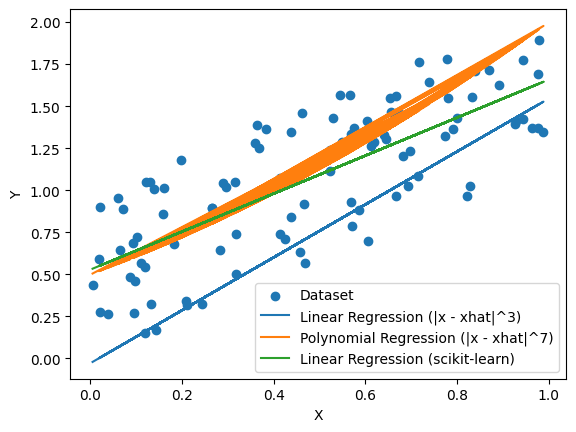

In [54]:
plt.scatter(X, Y, label='Dataset')
plt.plot(X, hypothesis_linear(w_linear, X, b_linear), label='Linear Regression (|x - xhat|^3)')
plt.plot(X, hypothesis_poly(u_poly, v_poly, w_poly, X), label='Polynomial Regression (|x - xhat|^7)')
plt.plot(X, model_sklearn.predict(X_reshaped), label='Linear Regression (scikit-learn)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [55]:
print("Linear Regression Coefficients (|x - xhat|^3):")
print("w:", w_linear)
print("b:", b_linear)

print("\nPolynomial Regression Coefficients (|x - xhat|^7):")
print("u:", u_poly)
print("v:", v_poly)
print("w:", w_poly)

print("\nLinear Regression Coefficients (scikit-learn):")
print("Intercept:", model_sklearn.intercept_)
print("Coefficient:", model_sklearn.coef_[0])

Linear Regression Coefficients (|x - xhat|^3):
w: [1.57298337]
b: [-0.0281673]

Polynomial Regression Coefficients (|x - xhat|^7):
u: 1.0
v: 0.5
w: 0.5

Linear Regression Coefficients (scikit-learn):
Intercept: 0.528123257029877
Coefficient: 1.1296312687960461


In [56]:
#Question 2
import pandas as pd
import seaborn as sns

In [57]:
df=pd.read_csv("/content/AirQualityUCI.csv")

In [58]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

Text(0.5, 1.0, 'AH')

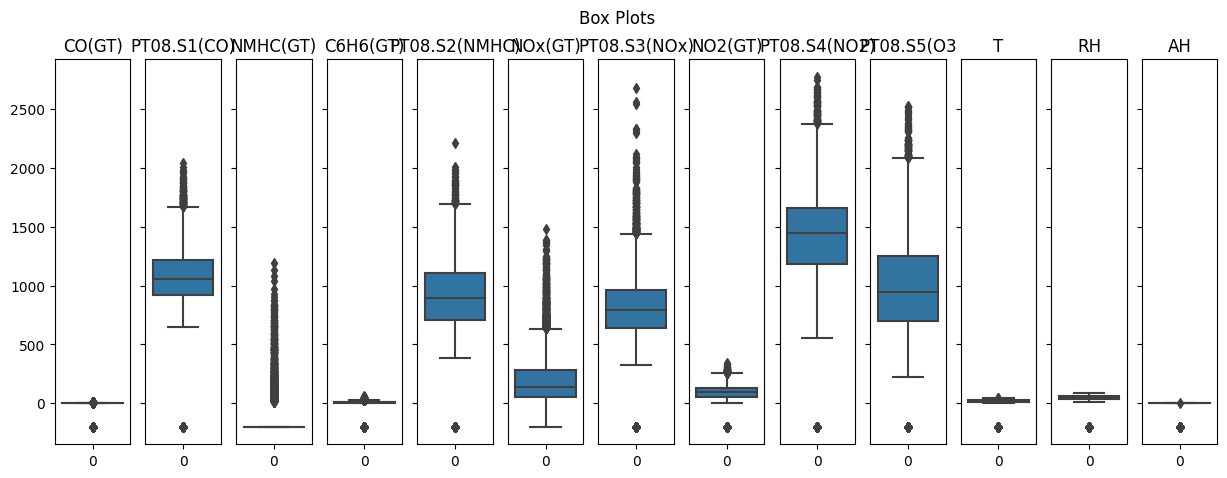

In [59]:
fig, axes = plt.subplots(1, 13, figsize=(15, 5), sharey=True)
fig.suptitle('Box Plots')

sns.boxplot(ax=axes[0],data=df['CO(GT)'])
axes[0].set_title("CO(GT)")

sns.boxplot(ax=axes[1],data=df['PT08.S1(CO)'])
axes[1].set_title("PT08.S1(CO)")

sns.boxplot(ax=axes[2],data=df['NMHC(GT)'])
axes[2].set_title("NMHC(GT)")

sns.boxplot(ax=axes[3],data=df['C6H6(GT)'])
axes[3].set_title("C6H6(GT)")

sns.boxplot(ax=axes[4],data=df['PT08.S2(NMHC)'])
axes[4].set_title("PT08.S2(NMHC)")

sns.boxplot(ax=axes[5],data=df['NOx(GT)'])
axes[5].set_title("NOx(GT)")

sns.boxplot(ax=axes[6],data=df['PT08.S3(NOx)'])
axes[6].set_title("PT08.S3(NOx)")

sns.boxplot(ax=axes[7],data=df['NO2(GT)'])
axes[7].set_title("NO2(GT)")

sns.boxplot(ax=axes[8],data=df['PT08.S4(NO2)'])
axes[8].set_title("PT08.S4(NO2)")

sns.boxplot(ax=axes[9],data=df['PT08.S5(O3)'])
axes[9].set_title("PT08.S5(O3")

sns.boxplot(ax=axes[10],data=df['T'])
axes[10].set_title("T")

sns.boxplot(ax=axes[11],data=df['RH'])
axes[11].set_title("RH")

sns.boxplot(ax=axes[12],data=df['AH'])
axes[12].set_title("AH")


In [60]:
correlation_matrix = df.iloc[:,2:].corr()
correlation_matrix.RH[abs(correlation_matrix['RH'])>0.05].index

Index(['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)',
       'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

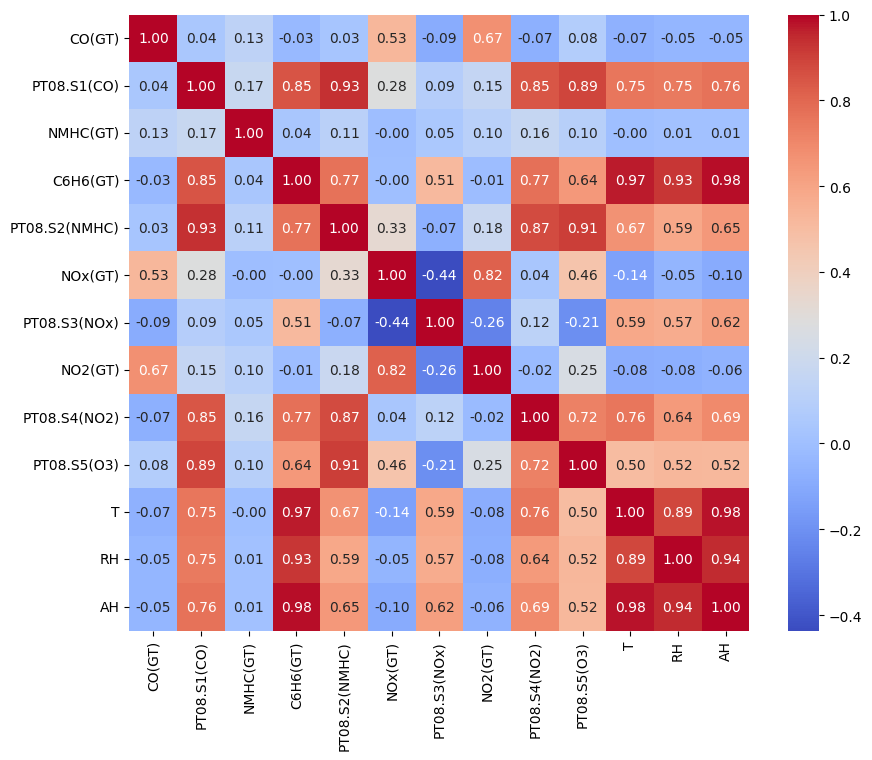

In [61]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [62]:
percentile25=df['CO(GT)'].quantile(0.25)
percentile75=df['CO(GT)'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit=percentile75+iqr
lower_limit=percentile25-iqr

In [63]:
# Define the lower limit
lower_limit   # Replace with your lower limit value

# Create a copy of the filtered subset using loc and apply the condition
filtered_subset = df.loc[df["CO(GT)"] < lower_limit].copy()

# Update the values in the filtered subset using loc
filtered_subset.loc[:, 'CO(GT)'] = lower_limit

# Update the original DataFrame using the index of the filtered subset
df.loc[filtered_subset.index] = filtered_subset

In [64]:
# Define the lower limit
upper_limit   # Replace with your lower limit value

# Create a copy of the filtered subset using loc and apply the condition
filtered_subset = df.loc[df["CO(GT)"] < upper_limit].copy()

# Update the values in the filtered subset using loc
filtered_subset.loc[:, 'CO(GT)'] = upper_limit

# Update the original DataFrame using the index of the filtered subset
df.loc[filtered_subset.index] = filtered_subset


<Axes: >

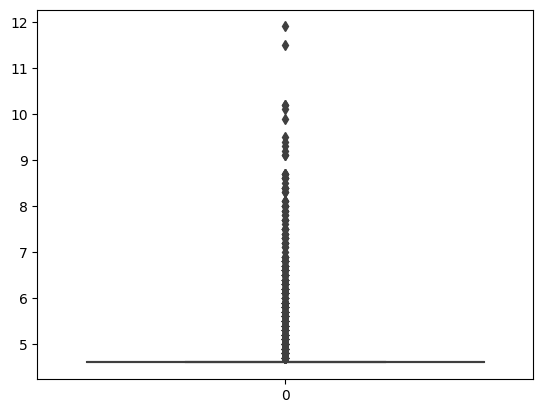

In [65]:
sns.boxplot(df['CO(GT)'])

In [66]:
for i in range(10):
    percentile25=df[df.columns[i+2]].quantile(0.25)
    percentile75=df[df.columns[i+2]].quantile(0.75)
    iqr=percentile75-percentile25
    upper_limit=percentile75+iqr
    lower_limit=percentile25-iqr
    # Define the lower limit
    lower_limit   # Replace with your lower limit value

    # Create a copy of the filtered subset using loc and apply the condition
    filtered_subset = df.loc[df[df.columns[i+2]] < lower_limit].copy()

    # Update the values in the filtered subset using loc
    filtered_subset.loc[:, df.columns[i+2]] = lower_limit

    # Update the original DataFrame using the index of the filtered subset
    df.loc[filtered_subset.index] = filtered_subset
    # Define the lower limit
    upper_limit   # Replace with your lower limit value

    # Create a copy of the filtered subset using loc and apply the condition
    filtered_subset = df.loc[df[df.columns[i+2]] < upper_limit].copy()

    # Update the values in the filtered subset using loc
    filtered_subset.loc[:, df.columns[i+2]] = upper_limit

    # Update the original DataFrame using the index of the filtered subset
    df.loc[filtered_subset.index] = filtered_subset

<ipython-input-66-9465c457b052>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  filtered_subset.loc[:, df.columns[i+2]] = lower_limit
<ipython-input-66-9465c457b052>:25: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  filtered_subset.loc[:, df.columns[i+2]] = upper_limit
<ipython-input-66-9465c457b052>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-u

Text(0.5, 1.0, 'AH')

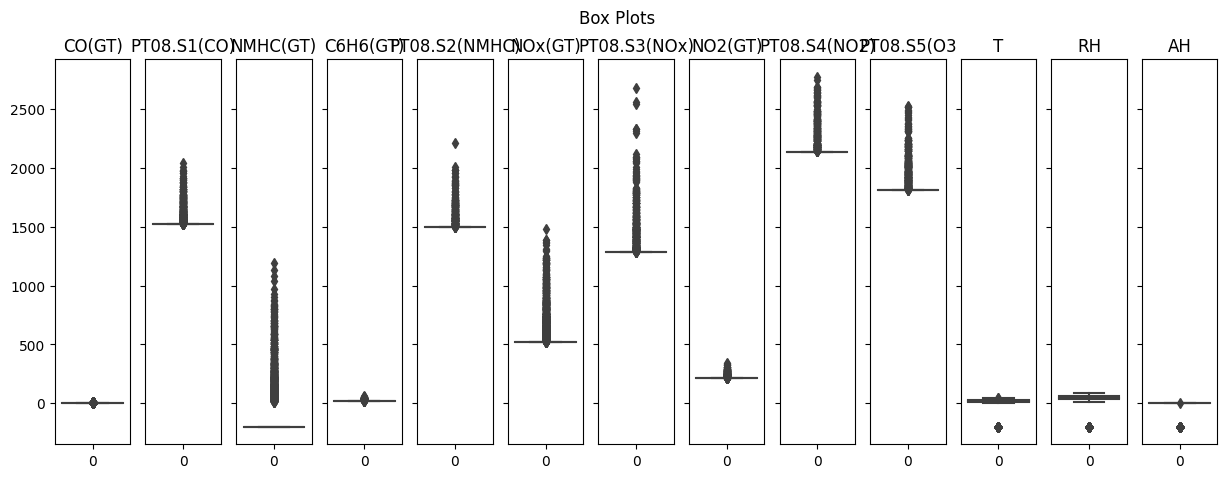

In [67]:
fig, axes = plt.subplots(1, 13, figsize=(15, 5), sharey=True)
fig.suptitle('Box Plots')

sns.boxplot(ax=axes[0],data=df['CO(GT)'])
axes[0].set_title("CO(GT)")

sns.boxplot(ax=axes[1],data=df['PT08.S1(CO)'])
axes[1].set_title("PT08.S1(CO)")

sns.boxplot(ax=axes[2],data=df['NMHC(GT)'])
axes[2].set_title("NMHC(GT)")

sns.boxplot(ax=axes[3],data=df['C6H6(GT)'])
axes[3].set_title("C6H6(GT)")

sns.boxplot(ax=axes[4],data=df['PT08.S2(NMHC)'])
axes[4].set_title("PT08.S2(NMHC)")

sns.boxplot(ax=axes[5],data=df['NOx(GT)'])
axes[5].set_title("NOx(GT)")

sns.boxplot(ax=axes[6],data=df['PT08.S3(NOx)'])
axes[6].set_title("PT08.S3(NOx)")

sns.boxplot(ax=axes[7],data=df['NO2(GT)'])
axes[7].set_title("NO2(GT)")

sns.boxplot(ax=axes[8],data=df['PT08.S4(NO2)'])
axes[8].set_title("PT08.S4(NO2)")

sns.boxplot(ax=axes[9],data=df['PT08.S5(O3)'])
axes[9].set_title("PT08.S5(O3")

sns.boxplot(ax=axes[10],data=df['T'])
axes[10].set_title("T")

sns.boxplot(ax=axes[11],data=df['RH'])
axes[11].set_title("RH")

sns.boxplot(ax=axes[12],data=df['AH'])
axes[12].set_title("AH")


In [68]:
correlation_matrix = df.iloc[:,2:].corr()
correlation_matrix.RH[abs(correlation_matrix['RH'])>0.05].index

Index(['NOx(GT)', 'NO2(GT)', 'T', 'RH', 'AH'], dtype='object')

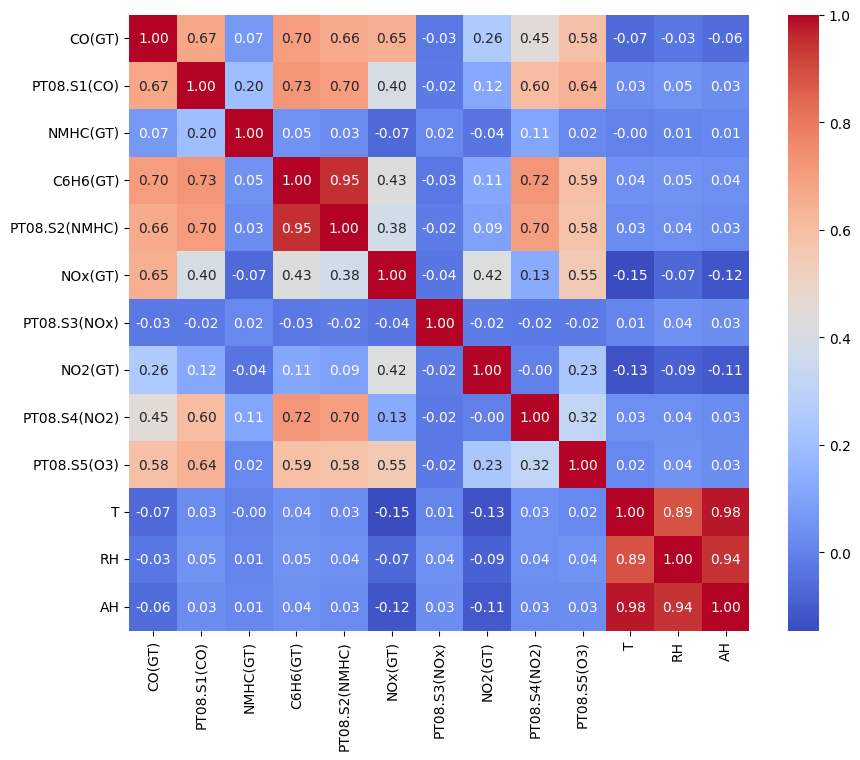

In [69]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [70]:
df=df.drop(['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)','Date','Time'], axis=1)
y=df['RH']
df.drop(['RH'],axis=1)
X=df

In [71]:
from sklearn.model_selection import train_test_split


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)